<a href="https://colab.research.google.com/github/Anna-bel25/AV/blob/main/IN_71_JUE_13_JUL_2023(Boston_RLS_RLM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Otra forma de como cargar un dataset

In [1]:
import pandas as pd

In [2]:
url =  'https://raw.githubusercontent.com/Darwin2016/dataset2022/main/dataSETS/housingBOSTON-2.csv'
df = pd.read_csv(url, delimiter=',')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
df.shape

(506, 14)

In [4]:
#seleccionar grupo de columna del data frame
## x contiene los patrones sintomatologicos ##
X = df.drop(["MEDV"], axis=1)
y = df["MEDV"]

In [5]:
print("X : ",type(X))
print("y: ",type(y))

X :  <class 'pandas.core.frame.DataFrame'>
y:  <class 'pandas.core.series.Series'>


In [6]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
X.shape

(506, 13)

In [8]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [9]:
#Regresion Lineal Simple
#seleccionar grupo de columnas del data frame (AGE,RM,CRIM,DIS)
## x contiene los patrones sintomatologicos ##
X = df[["RM"]]
y = df["MEDV"]

In [10]:
#Regresion Lineal Multiple
#seleccionar grupo de columnas del data frame (AGE,RM,CRIM,DIS)
## x contiene los patrones sintomatologicos ##
#X = df[["AGE","RM","CRIM","DIS"]]
#y = df["MEDV"]

In [11]:
X.head()

,RM
0,6.575
1,6.421
2,7.185
3,6.998
4,7.147


In [12]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

## usar sklearn para los modelos de prediccion

In [13]:
import numpy as np
from sklearn import linear_model # para aplicar el modelo de regresion lineal
from sklearn.model_selection import train_test_split #para separar del total de la data (training y testing)
from sklearn.metrics import mean_squared_error, r2_score ,mean_absolute_error

In [14]:
X.shape

(506, 1)

In [15]:
## División de los datos: 80% para entrenamiento y 20% para prueba ##
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=4)

In [16]:
X_train.shape

(404, 1)

In [17]:
X_test.shape

(102, 1)

In [18]:
X_train.shape

(404, 1)

In [19]:
X_test.head()

,RM
8,5.631
289,6.565
68,5.594
211,5.404
226,8.040


In [20]:
X_test.shape

(102, 1)

##Creación del Modelo de Aprendizaje (Regresión Lineal)

In [21]:
# Creamos el objeto de Regresión Linear
lm = linear_model.LinearRegression()

##Entrenamiento o Ajuste (aquí es donde aprende)

In [24]:
#Entrenar el modelo
lm.fit(X_train, y_train)

LinearRegression()

In [23]:
X_test.shape

(102, 1)

##Realizar predicciones usando los datos de Test

In [25]:
#Hacer una prediccion con datos separados para pruebas(test)
pred = lm.predict(X_test)

Text(0.5, 1.0, 'Boston House')

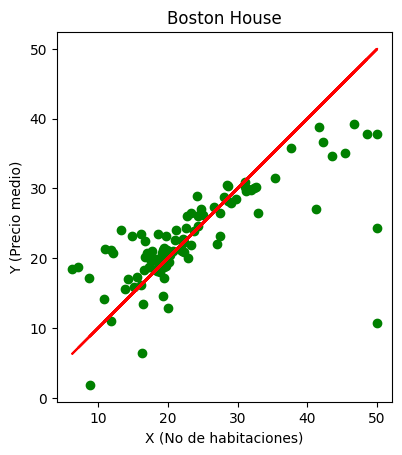

In [51]:
#Gráfico de dispersión
import matplotlib.pyplot as plt

test_predictions = lm.predict(X_test).flatten()
a=plt.axes(aspect='equal')
plt.scatter(y_test,test_predictions, c='green')
plt.xlabel('X (No de habitaciones)')
plt.ylabel('Y (Precio medio)')
_=plt.plot(y_test,y_test,color='red')
plt.title('Boston House')

y = m X - b o también y = W0 + w1 x

In [55]:
#w1
lm.coef_

array([-0.09164391,  7.86296082, -0.23795713, -0.75190819])

In [53]:
#w0
lm.intercept_

-16.97390769387898

In [26]:
pred.shape

(102,)

##Mostrar las predicciones

In [27]:
print("VPred---VReal---Error")
for indice in range(10):
  error = np.abs(y_test.iloc[indice]-pred[indice]) #calculo del error (valor real - valor de prediccion)
  print("{:0.2f}   {:0.2f}  {:0.2f}".format(pred[indice],y_test.iloc[indice],error))

VPred---VReal---Error
16.57   16.50  0.07
24.91   24.80  0.11
16.24   17.40  1.16
14.54   19.30  4.76
38.09   37.60  0.49
23.59   24.20  0.61
31.02   35.40  4.38
21.36   19.90  1.46
27.48   27.50  0.02
21.02   17.00  4.02


##usando las metricas para ver el error cuadratico

In [28]:
# Error Cuadrado Medio
print("Error cuadratico medio: %.2f" % mean_squared_error(y_test,pred))

Error cuadratico medio: 51.61


In [29]:
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_test, pred))

Variance score: 0.44


##Con datos nuevos de entrada , datos que el modelo no conoce

In [30]:
# una entrada nueva
df5 = pd.DataFrame({"RM": [6.7]})

In [31]:
#print(float(df5.iloc[0]),float(df5["RM"]))
prediccion = lm.predict(df5)
#print(prediccion)
print('Casa con {} habitaciones , su precio estimado: {:.2f}'.format(float(df5.iloc[0]),float(prediccion)))

Casa con 6.7 habitaciones , su precio estimado: 26.12


##Regresion Lineal Multiple

In [32]:
import pandas as pd
import numpy as np
from sklearn import linear_model # para aplicar el modelo de regresion lineal
from sklearn.model_selection import train_test_split #para separar del total de la data (training y testing)
from sklearn.metrics import mean_squared_error, r2_score ,mean_absolute_error

In [33]:
url =  'https://raw.githubusercontent.com/Darwin2016/dataset2022/main/dataSETS/housingBOSTON-2.csv'
df = pd.read_csv(url, delimiter=',')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [34]:
#Regresion Lineal Multiple
#seleccionar grupo de columnas del data frame (AGE,RM,CRIM,DIS)
## x contiene los patrones sintomatologicos ##
X = df[["AGE","RM","CRIM","DIS"]]
y = df["MEDV"]

In [35]:
## División de los datos: 80% para entrenamiento y 20% para prueba ##
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=4)

In [36]:
# Creamos el objeto de Regresión Linear
lm = linear_model.LinearRegression()
#Entrenar el modelo
lm.fit(X_train, y_train)
#Hacer una prediccion con datos separados para pruebas(test)
pred = lm.predict(X_test)

In [37]:
print("VPred---VReal---Error")
for indice in range(10):
  error = np.abs(y_test.iloc[indice]-pred[indice]) #calculo del error (valor real - valor de prediccion)
  print("{:0.2f}   {:0.2f}  {:0.2f}".format(pred[indice],y_test.iloc[indice],error))

VPred---VReal---Error
13.51   16.50  2.99
27.04   24.80  2.24
18.72   17.40  1.32
14.55   19.30  4.75
35.81   37.60  1.79
28.88   24.20  4.68
31.48   35.40  3.92
20.50   19.90  0.60
23.20   27.50  4.30
20.77   17.00  3.77


In [38]:
# Error Cuadrado Medio
print("Error cuadratico medio: %.2f" % mean_squared_error(y_test,pred))

Error cuadratico medio: 43.40


In [39]:
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_test, pred))

Variance score: 0.53


In [40]:
print('Mean Absolute Error(MAE):{:.2f}'.format(mean_absolute_error(y_test, pred)))
print('Mean Squared Error(MSE):{:.2f}'.format(mean_squared_error(y_test, pred)))
print('Root Mean Squared Error(RMSE):{:.2f}'.format(np.sqrt(mean_squared_error(y_test, pred))))

Mean Absolute Error(MAE):3.87
Mean Squared Error(MSE):43.40
Root Mean Squared Error(RMSE):6.59


In [41]:
# una entrada nueva
df5 = pd.DataFrame({"AGE":[60.3],"RM": [6.7],"CRIM":[0.023],"DIS":[3.7]})

In [42]:
prediccion = lm.predict(df5)
print(prediccion)
#print('Casa con {} habitaciones , su precio estimado: {:.2f}'.format(float(df5.iloc[0]),float(prediccion)))

[27.39426875]
